# Import Necessary Libraries

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import skimage

# Loading Images

In [ ]:
charachters = skimage.io.imread('/content/characters.tif')
Blurred_HighNoise = skimage.io.imread('/content/Blurred_HighNoise.png')
Blurred_LowNoise =  skimage.io.imread('/content/Blurred_LowNoise.png')

# **Q1. Radial Sinusoid and its Frequency Response:**
(a) Generate a radial sinusoid image of size $M×M$ using $x(u, v) = cos(\frac{2πf_0}{M} × D(u, v))$, where the distance from centre $D(u, v) = \sqrt{(u − M/2)^{2} + (v − M/2)^{2}}$ with the side length $M = 500$ and frequency $f_0 = 50$.

(b) Compute the DFT of this image. The DFT is computed with origin at (0, 0). To visualize the DFT response, cyclically shift this to the centre (using the library function `fftshift`). Visualize the magnitude of DFT.

(c) Compute IDFT of the DFT response and compare the reconstructed image with the input. Try changing the frequency $f_0$ and comment on the results.

Note: Fast Fourier Transform (FFT) is an algorithm that is used for efficient computation of
DFT of discrete signals. You can use MATLAB (or python) built-in function for computing the
2D FFT and IFFT.

In [3]:
# Creating function generating Radial Sinusoid Image

def create_radial_sinusoid_image(M,f_0):

  Image = [[ math.cos((2*math.pi*f_0)*((i-M/2)**2+(j-M/2)**2)**0.5/M) for i in range(M)] for j in range(M)]

  return Image

In [6]:
# Demo Code
radial_sinusoid_image = create_radial_sinusoid_image(500,50)
radial_sinusoid_image_dft = np.fft.fftshift(np.fft.fft2(radial_sinusoid_image))
radial_sinusoid_image_reconstructed = np.fft.ifft2(np.fft.fftshift(radial_sinusoid_image_dft))

(-0.5, 499.5, 499.5, -0.5)

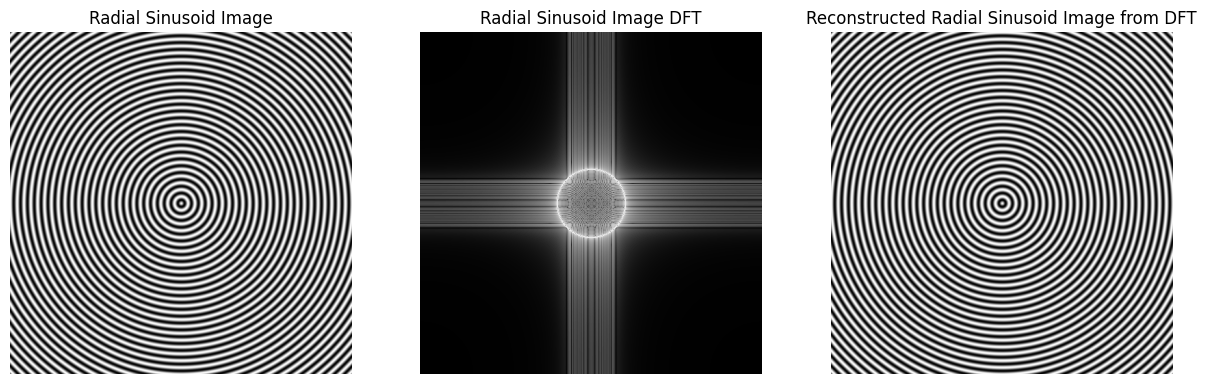

In [7]:
# Result Cell

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.imshow(radial_sinusoid_image,cmap = 'gray')
plt.title('Radial Sinusoid Image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(np.log(abs(radial_sinusoid_image_dft)+1),cmap = 'gray')
plt.title('Radial Sinusoid Image DFT')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(np.real(radial_sinusoid_image_reconstructed),cmap = 'gray')
plt.title('Reconstructed Radial Sinusoid Image from DFT')
plt.axis('off')

# **Q2. Frequency Domain Filtering:**
(a) Filter the image `characters.tif` in the frequency domain using an ideal low pass filter
(ILPF). The expression for the ILPF is
\begin{equation}
H(u, v;D_0) =
\left\{
    \begin{array}{lr}
         1 , & \text{if } D(u, v) ≤ D_0\\
         0, & \text{if } D(u, v) > D_0
    \end{array}
\right\}
\end{equation}

where $D_0$ is a positive constant referred to as the cut-off frequency and $D(u, v)$ is the distance between a point $(u, v)$ in the frequency domain and the center of the frequency rectangle, i.e., $D(u, v) = \sqrt{(u − P/2)^{2} + (v − Q/2)^{2}}$ , where $P$ and $Q$ are the number of rows and columns in the image. What artefacts do you notice in the image obtained by computing the inverse DFT of the filtered image?

Note: The filter given above is centred in frequency domain. To use such centred filter, you will either need to shift the filter to $(0, 0)$ (by using fftshift in matlab or corresponding function in python) or center the DFT of the image. To center the DFT of the image, you can either shift the DFT of the image, or scale each image pixel $I(x, y)$ by $−1^{x+y}$ before computing its DFT. If you center the DFT of the image, then you will need to compensate for it by multiplying the image obtained from inverse DFT of the filtered image by $−1^{x+y}$.

(b) Filter the image `characters.tif` in the frequency domain using the Gaussian low pass filter given by
\begin{equation}
H(u, v;D_0) = e^{− \frac{D^{2}(u, v)}{2D_0^{2}}}
\end{equation}
where all the terms are as explained in part (b). For $D_0$ = 100, compare the result with that
of the ILPF.

In [ ]:
def ideal_low_pass_filter(image,D_0):
  P = len(image)
  Q = len(image[0])

  ILPF = [[ 1 if ((i-P/2)**2+(j-Q/2)**2)**0.5<= D_0 else 0 for i in range(P)] for j in range(Q)]  # Creating ILPF

  image_spectrum = np.fft.fftshift(np.fft.fft2(image))

  filtered_image_spectrum = image_spectrum * ILPF                               # Filtering in Freq domain

  filtered_image = np.fft.ifft2(np.fft.fftshift(filtered_image_spectrum))

  return abs(filtered_image),abs(filtered_image_spectrum)

def gaussian_low_pass_filter(image,D_0):
  P = len(image)
  Q = len(image[0])

  gaussian_filter = [[ math.exp(-((i-P/2)**2+(j-Q/2)**2)/(2*D_0**2)) for i in range(P)]for j in range(Q)] # Creating Gaussian Filter in Freq Domain

  image_spectrum = np.fft.fftshift(np.fft.fft2(image))

  filtered_image_spectrum = image_spectrum * gaussian_filter                    # Filtering in Freq Domain

  filtered_image = np.fft.ifft2(np.fft.fftshift(filtered_image_spectrum))

  return abs(filtered_image),abs(filtered_image_spectrum)

In [ ]:
P = len(charachters)
Q = len(charachters[0])

D_0 = 100

ILPF = [[ 1 if ((i-P/2)**2+(j-Q/2)**2)**0.5<= D_0 else 0 for i in range(P)] for j in range(Q)]
gaussian_filter = [[ math.exp(-((i-P/2)**2+(j-Q/2)**2)/(2*D_0**2)) for i in range(P)]for j in range(Q)]

In [ ]:
# Demo Code

charachters_ilpf_filtered = ideal_low_pass_filter(charachters,D_0)
charachters_glpf_filtered = gaussian_low_pass_filter(charachters,D_0)

Text(0.5, 1.0, 'Image filtered Gaussian Filter')

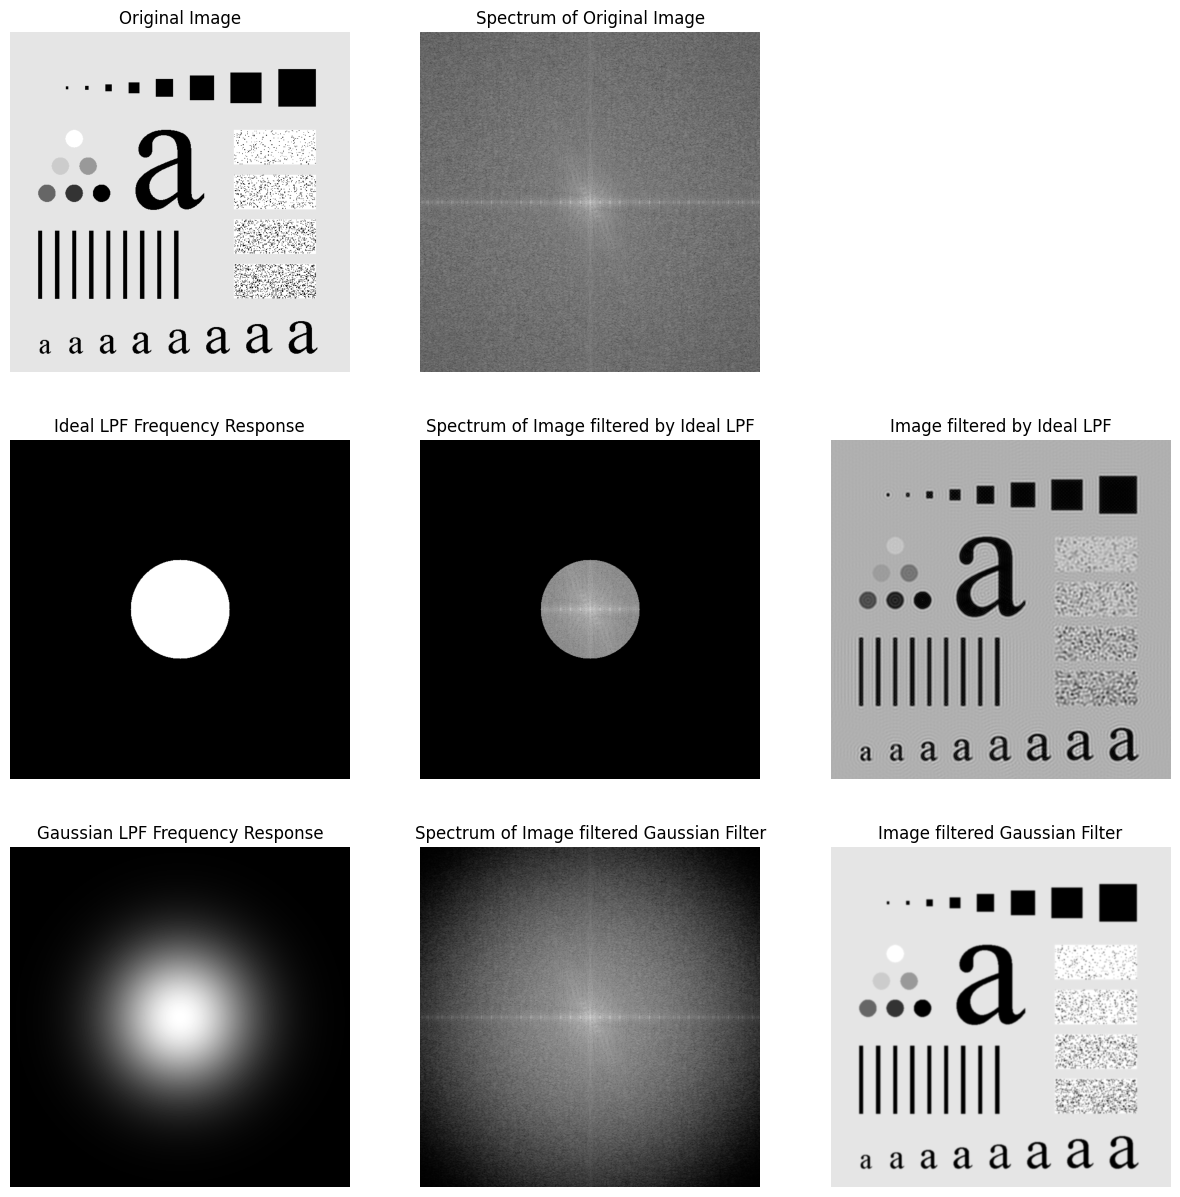

In [ ]:
#Result Cell

plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
plt.imshow(charachters,cmap = 'gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(3,3,2)
plt.imshow(np.log(abs(np.fft.fftshift(np.fft.fft2(charachters)))+1),cmap = 'gray')
plt.axis('off')
plt.title('Spectrum of Original Image')
plt.subplot(3,3,4)
plt.imshow(ILPF,cmap = 'gray')
plt.axis('off')
plt.title('Ideal LPF Frequency Response')
plt.subplot(3,3,5)
plt.imshow(np.log(charachters_ilpf_filtered[1]+1),cmap = 'gray')
plt.axis('off')
plt.title('Spectrum of Image filtered by Ideal LPF')
plt.subplot(3,3,6)
plt.imshow(charachters_ilpf_filtered[0],cmap = 'gray')
plt.axis('off')
plt.title('Image filtered by Ideal LPF')
plt.subplot(3,3,7)
plt.imshow(gaussian_filter,cmap = 'gray')
plt.axis('off')
plt.title('Gaussian LPF Frequency Response')
plt.subplot(3,3,8)
plt.imshow(np.log(charachters_glpf_filtered[1]+1),cmap = 'gray')
plt.axis('off')
plt.title('Spectrum of Image filtered Gaussian Filter')
plt.subplot(3,3,9)
plt.imshow(charachters_glpf_filtered[0],cmap = 'gray')
plt.axis('off')
plt.title('Image filtered Gaussian Filter')

# **Q3. Image Deblurring:**
Deblur the images `Blurred_LowNoise.png` (White Noise Standard Deviation $(σ)=1$) and `Blurred_HighNoise.png` ($σ = 10$) which have been blurred by the kernel BlurKernel.mat using

**(a) Inverse filtering:** Simple inverse filtering may lead to amplification of noise (why?). To mitigate amplification of high frequency noise, set the inverse filter fft values to 0 wherever blur filter fft values are below a threshold $t$. Set $t = 0.1$.

Note: The blur kernel given is centered at $(10, 25)$ in matlab convention and $(9, 24)$ in python convention. In other words, the maximum value $0.02$ corresponds to $(0, 0)$ of the filter. So, before computing DFT, you need to shift the filter such that $(10, 25)$ moves to $(1, 1), (10, 24$) moves to $(1,N), (9, 25)$ moves to $(M, 1)$ and $(9, 24)$ moves to $(M,N)$ and so on in matlab convention. In python convention $(9, 24)$ moves to $(0, 0), (9, 23)$ moves to $(0,N − 1), (8, 24)$ moves to $(M −1, 0)$ and $(8, 23)$ moves to $(M −1,N −1)$ and so on. $M, N$ are the height and width of the blurred image respectively.

**(b) Wiener filter:** You can assume the PSD of the white noise is equal to σ specified. For signal PSD, use power law
\begin{equation}
S_f(u, v) = \frac{k}{\sqrt{u^2 + v^2}}
\end{equation}
Use $k = 10^5$.

Note: Recall that $S_f(u, v)$ is periodic and $S_f(−u,−v) = S_f(M − u,N − v)$ where $M, N$ are height and width of the blurred image respectively .

Note: `BlurKernel.mat` is a matlab workspace variable file. You can load this file using the function `load(‘BlurKernel.mat’)` in matlab provided that the file is stored in your working directory. For python, use `scipy.io.loadmat(‘BlurKernel.mat’)`.

## Inverse filtering

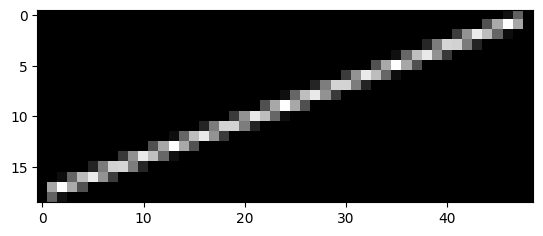

In [ ]:
Blurkernel = scipy.io.loadmat('/content/BlurKernel.mat')['h']
plt.imshow(Blurkernel,cmap='gray')

In [ ]:
def Restore_Image(g,h,t,sigma):

  M = len(g)                                                                    # Height of Image
  N = len(g[0])                                                                 # width of Image

  H = np.fft.fft2(h,(M,N))                                                      # M,N point DFT of the Blurkernel Reshapes the kernel accordingly

  H_inverse = 1/H                                                               # Inverse Filter
  H_inverse[np.abs(H)<=t] = 0                                                   # Minimizing amplification of noise by thresholding

  G =  np.fft.fft2(g)                                                           # DFT of given image

  G_restored = G * H_inverse                                                    # Inverse Filtering

  g_restored = np.fft.ifft2(G_restored)

  g_restored = np.real(g_restored)                                              # Restored Image

  g_restored = np.array((g_restored - np.min(g_restored)),dtype=int)
  g_restored = np.array((g_restored*255/np.max(g_restored)),dtype=int)          # Full Scale Contrast Stretching Restored Image (0-255 intensity)

  return g_restored

In [ ]:
# Demo Code
restored_image_lownoise = Restore_Image(Blurred_LowNoise,Blurkernel,0.1,1)
restored_image_highnoise = Restore_Image(Blurred_HighNoise,Blurkernel,0.1,10)

Text(0.5, 1.0, 'Restored Image from Blurred/Noisy(High) Image')

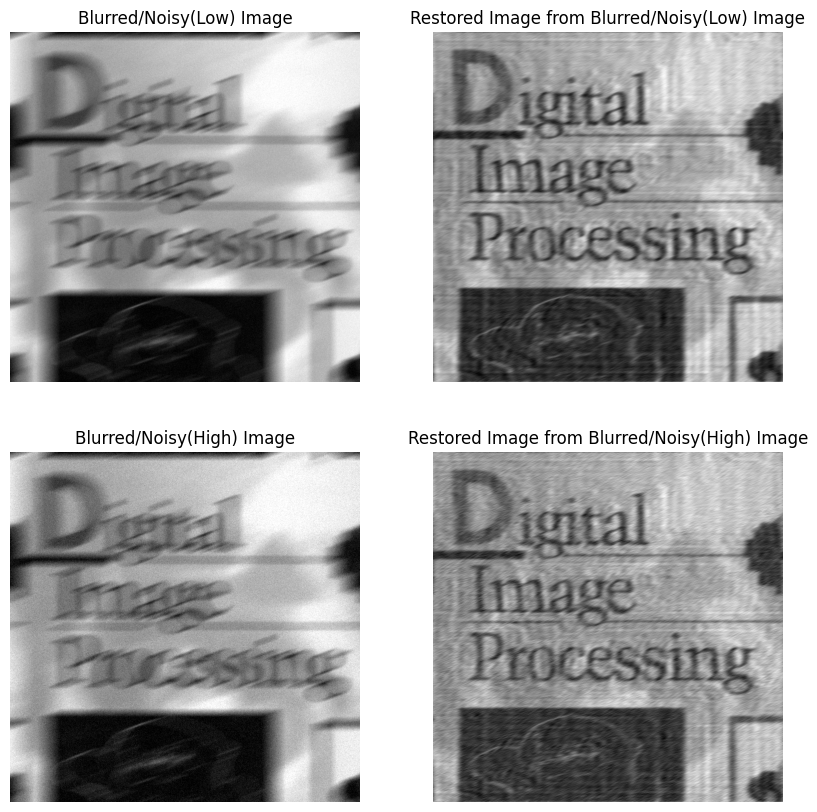

In [ ]:
# Result Cell

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.imshow(Blurred_LowNoise,cmap='gray')
plt.axis('off')
plt.title('Blurred/Noisy(Low) Image')
plt.subplot(2,2,2)
plt.imshow(restored_image_lownoise,cmap='gray')
plt.axis('off')
plt.title('Restored Image from Blurred/Noisy(Low) Image')
plt.subplot(2,2,3)
plt.imshow(Blurred_HighNoise,cmap='gray')
plt.axis('off')
plt.title('Blurred/Noisy(High) Image')
plt.subplot(2,2,4)
plt.imshow(restored_image_highnoise,cmap='gray')
plt.axis('off')
plt.title('Restored Image from Blurred/Noisy(High) Image')

## Wiener Filter

In [ ]:
def Restore_wiener(Image,h,sigma):

  M = len(Image)                                                                # Height of Image
  N = len(Image[0])                                                             # Width of Image

  k=10**5

  H = np.fft.fft2(h,(M,N))                                                      # M,N point DFT of the Blurkernel Reshapes the kernel accordingly
  G = np.fft.fft2(Image)

  x = np.arange(0,M//2+1,1)
  x = np.concatenate((x,np.flip(x[1:-1])))
  y = np.arange(0,N//2+1,1)
  y = np.concatenate((y,np.flip(y[1:-1])))

  xv, yv = np.meshgrid(x, y, indexing='ij')

  Sf = k/((xv**2+yv**2)**0.5)
  Sf[((xv**2+yv**2)**0.5)==0]=np.abs(G[0][0])**2                                # PSD for an image (Power Law)

  Sw = np.ones((M,N),dtype = float)*sigma                                       # PSD for White Noise

  D = np.conjugate(H)/((np.abs(H))**2 + Sw/Sf)                                  # Main formula for Wiener Filter

  G_restored = G * D                                                            # DFT Spectrum of restored image

  g_restored = np.real(np.fft.ifft2(G_restored))                                # Restored Image

  g_restored = np.array((g_restored - np.min(g_restored)),dtype=int)
  g_restored = np.array((g_restored*255/np.max(g_restored)),dtype=int)          # Full Scale Contrast Stretching Restored Image (0-255 intensity)


  return g_restored

In [ ]:
# Demo Code
wiener_restored_Blurred_lownoise = Restore_wiener(Blurred_LowNoise,Blurkernel,1)
wiener_restored_Blurred_highnoise = Restore_wiener(Blurred_HighNoise,Blurkernel,10)

Text(0.5, 1.0, 'Restored Image from Blurred/Noisy(High) Image')

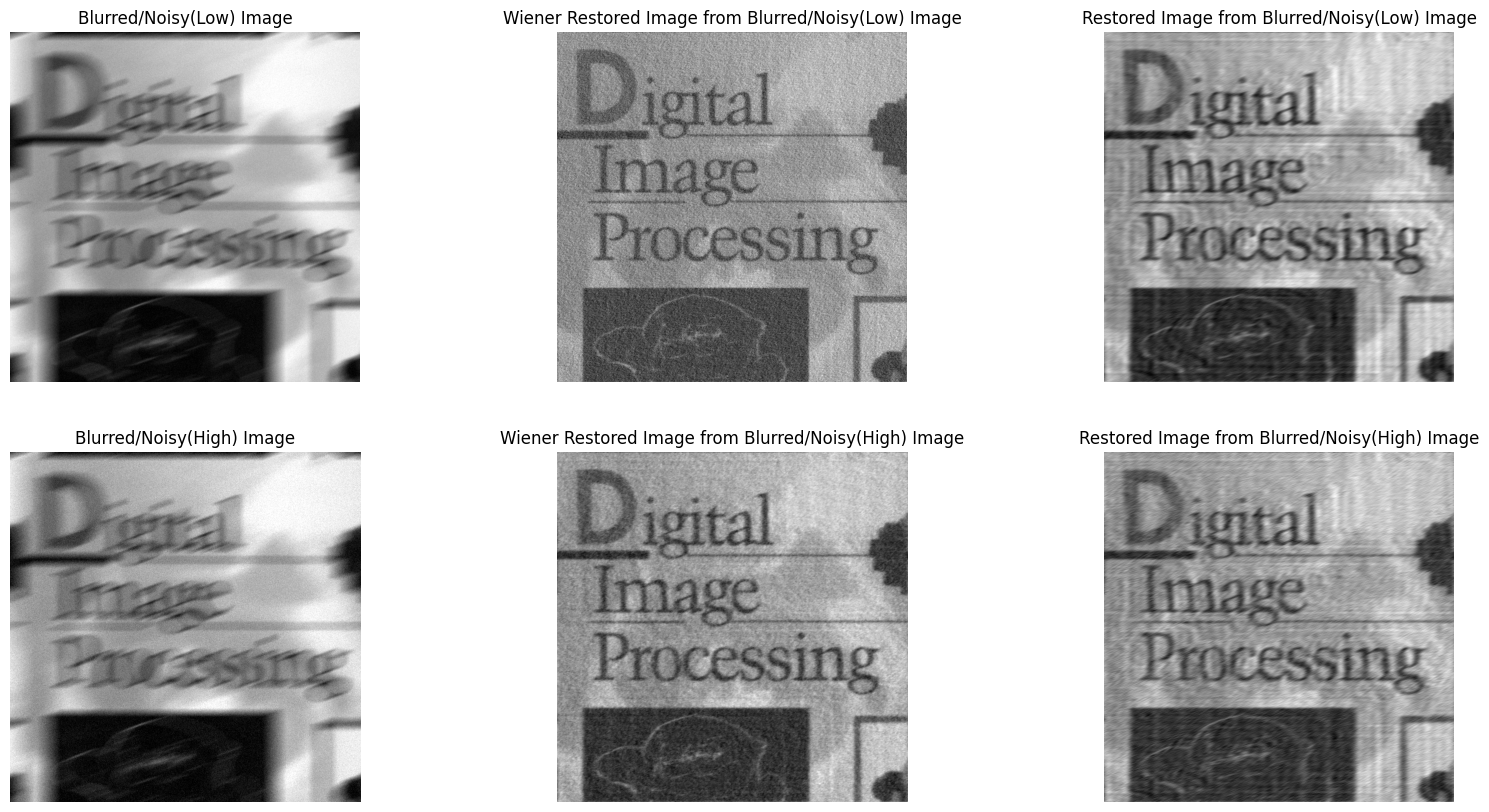

In [ ]:
# Result Cell

plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
plt.imshow(Blurred_LowNoise,cmap='gray')
plt.axis('off')
plt.title('Blurred/Noisy(Low) Image')
plt.subplot(2,3,2)
plt.imshow(wiener_restored_Blurred_lownoise,cmap='gray')
plt.axis('off')
plt.title('Wiener Restored Image from Blurred/Noisy(Low) Image')
plt.subplot(2,3,3)
plt.imshow(restored_image_lownoise,cmap='gray')
plt.axis('off')
plt.title('Restored Image from Blurred/Noisy(Low) Image')
plt.subplot(2,3,4)
plt.imshow(Blurred_HighNoise,cmap='gray')
plt.axis('off')
plt.title('Blurred/Noisy(High) Image')
plt.subplot(2,3,5)
plt.imshow(wiener_restored_Blurred_highnoise,cmap='gray')
plt.axis('off')
plt.title('Wiener Restored Image from Blurred/Noisy(High) Image')
plt.subplot(2,3,6)
plt.imshow(restored_image_highnoise,cmap='gray')
plt.axis('off')
plt.title('Restored Image from Blurred/Noisy(High) Image')